In [1]:
!pip install pennylane numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 70.6 MB/s eta 0:00:00


In [2]:
import pennylane as qml
import numpy as np
from pennylane.transforms import decompose
import itertools
from matplotlib import pyplot as plt

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


In [3]:
state = np.sqrt(np.array([0.1, 0.9])) #Initial states
n = 3; # Number of rounds
select = list(itertools.product([0, 1], repeat=n))
gate_set={qml.CNOT, qml.RX, qml.RZ, qml.RY, qml.T, qml.S, qml.H, qml.Toffoli}

# Midciruict measurement

In [4]:
@qml.qnode(qml.device("default.qubit"))
def node(state, select):
    qml.StatePrep(state, wires=0)
    qml.StatePrep(state[::-1], wires=1)
    qml.Barrier()
    for i in range(n):
      #Unitary
      qml.Hadamard(0)
      qml.CNOT([0,1])
      qml.CNOT([0,2])
      qml.Barrier()
      # Measure Reset condition
      qml.measure(2, postselect=select[i], reset=True)
      qml.Barrier()
    return qml.probs(wires=[0,1])

(<Figure size 2600x400 with 1 Axes>, <Axes: >)


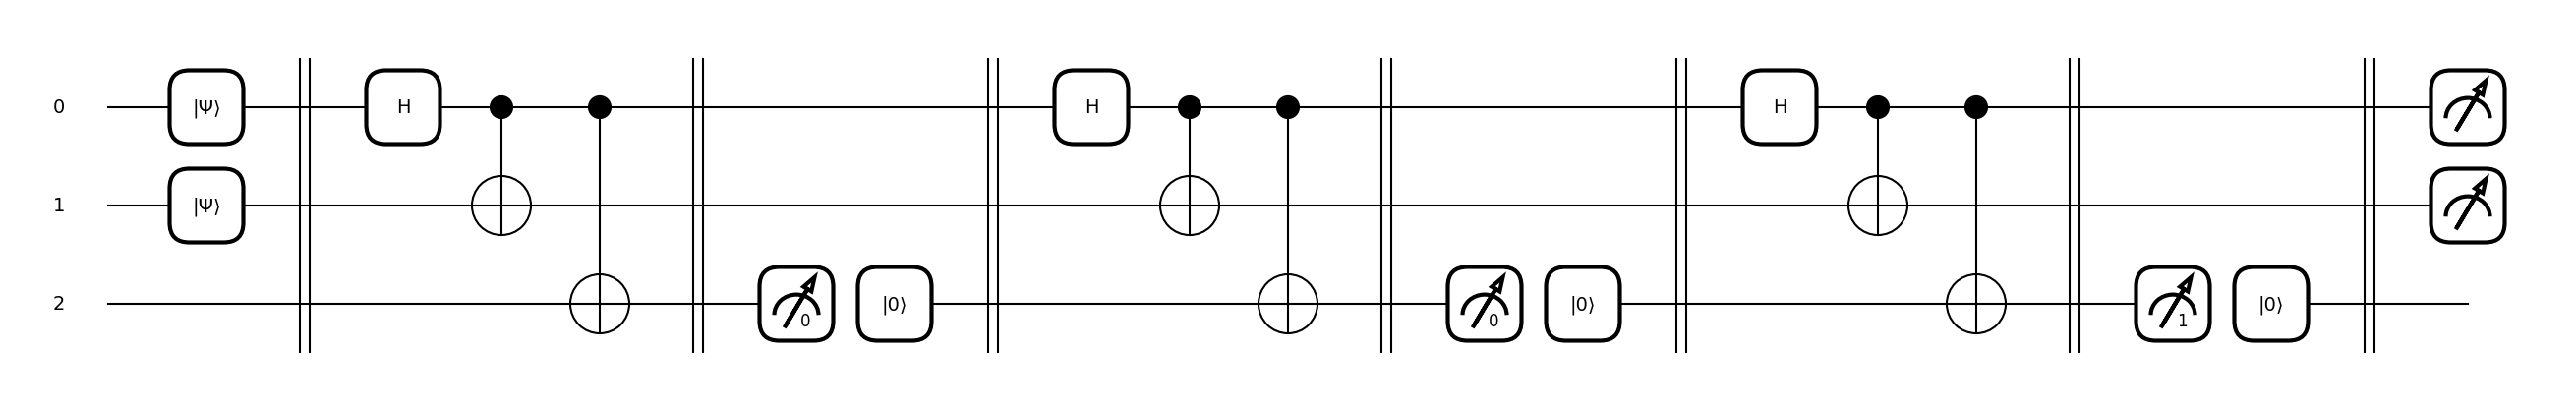

In [5]:
print(qml.draw_mpl(node)(state, select[1]))

In [6]:
for i in range(2**n):
  print(node(state, select[i]))
  print(qml.specs(node)(state, select[i]))

[0.9 0.1 0.  0. ]
{'resources': Resources(num_wires=3, num_gates=21, gate_types=defaultdict(<class 'int'>, {'StatePrep': 2, 'Barrier': 7, 'Hadamard': 3, 'CNOT': 6, 'MidMeasureMP': 3}), gate_sizes=defaultdict(<class 'int'>, {1: 8, 0: 7, 2: 6}), depth=20, shots=Shots(total_shots=None, shot_vector=())), 'errors': {}, 'num_observables': 1, 'num_trainable_params': 0, 'num_device_wires': 3, 'num_tape_wires': 3, 'device_name': 'default.qubit', 'level': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
[0.  0.  0.1 0.9]
{'resources': Resources(num_wires=3, num_gates=21, gate_types=defaultdict(<class 'int'>, {'StatePrep': 2, 'Barrier': 7, 'Hadamard': 3, 'CNOT': 6, 'MidMeasureMP': 3}), gate_sizes=defaultdict(<class 'int'>, {1: 8, 0: 7, 2: 6}), depth=20, shots=Shots(total_shots=None, shot_vector=())), 'errors': {}, 'num_observables': 1, 'num_trainable_params': 0, 'num_device_wires': 3, 'num_tape_wires': 3, 'device_name': 'default.qubit', 'l

# Deferred with post projection

In [7]:
@qml.qnode(qml.device("default.qubit"))
def node_defer(state, select):
    qml.StatePrep(state, wires=0)
    qml.StatePrep(state[::-1], wires=1)
    qml.Barrier()
    for i in range(n):
      #Unitary
      qml.Hadamard(0)
      qml.CNOT([0,1])
      qml.CNOT([0,2])
      qml.Barrier()
      # Measure_reset
      qml.CNOT([2,3+i])
      # qml.SWAP([3 + n + i,2])
      qml.CNOT([3+i,2])
      qml.Barrier()
    qml.Projector(select, wires=list(range(3, n+3)))
    return qml.probs(wires=[0,1])

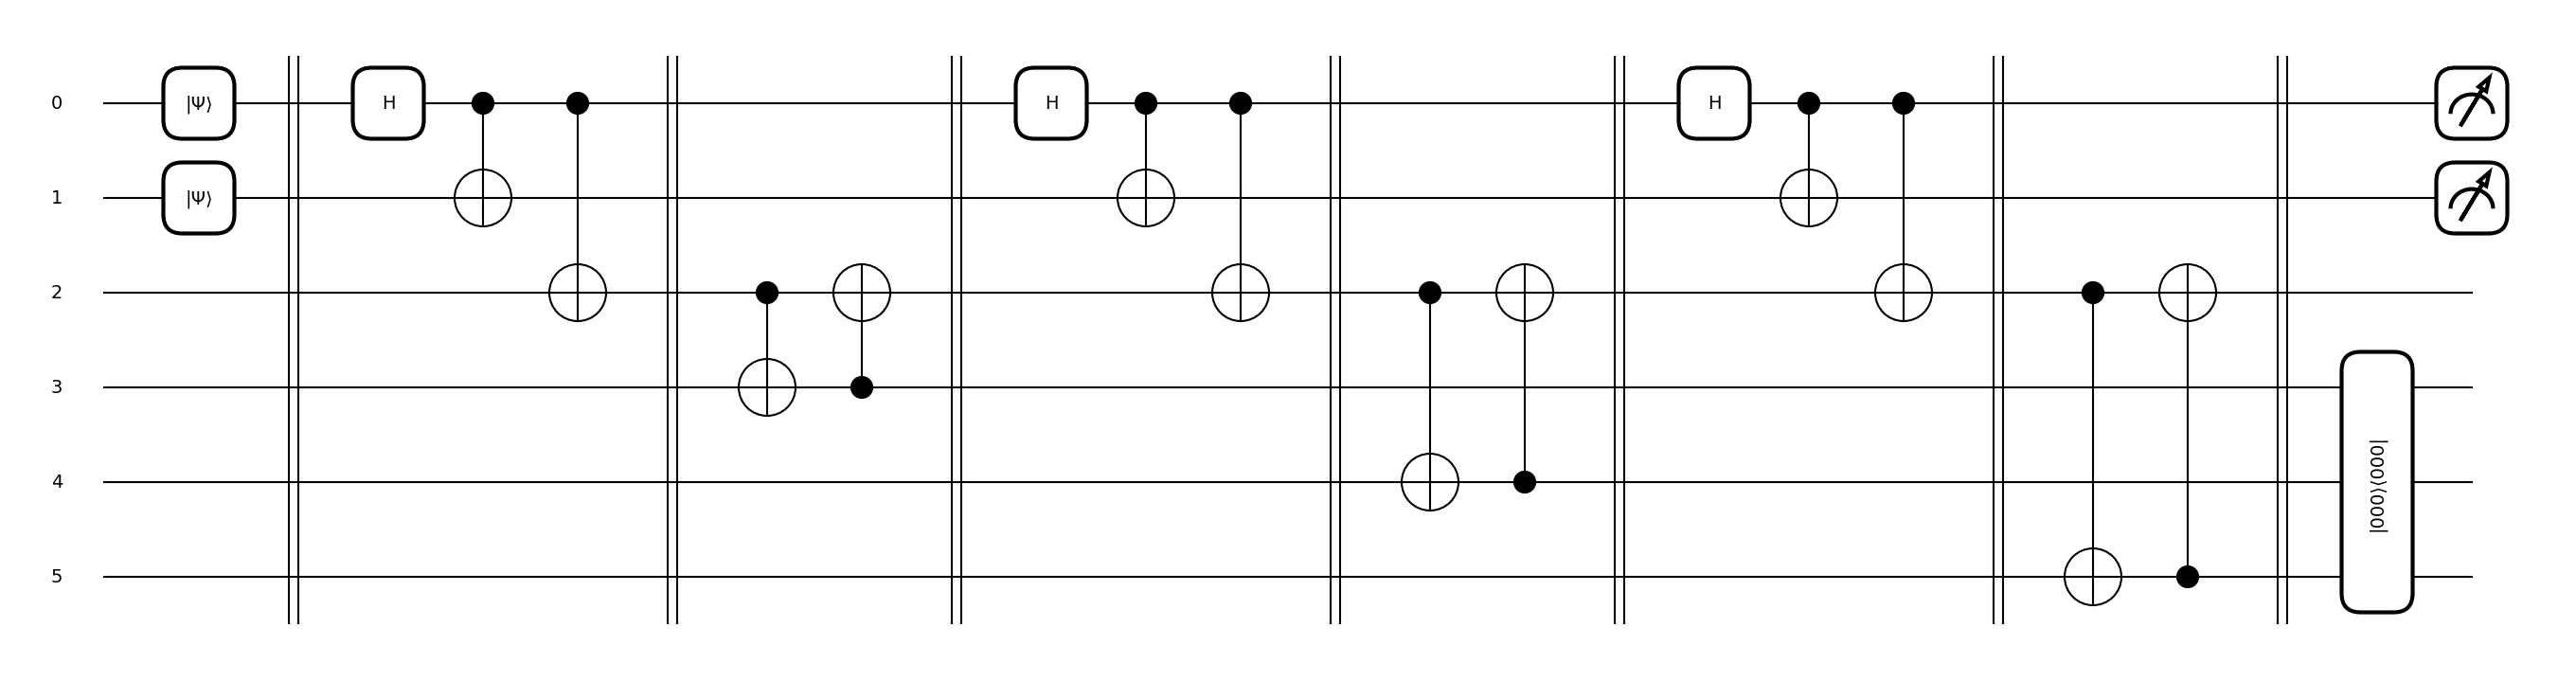

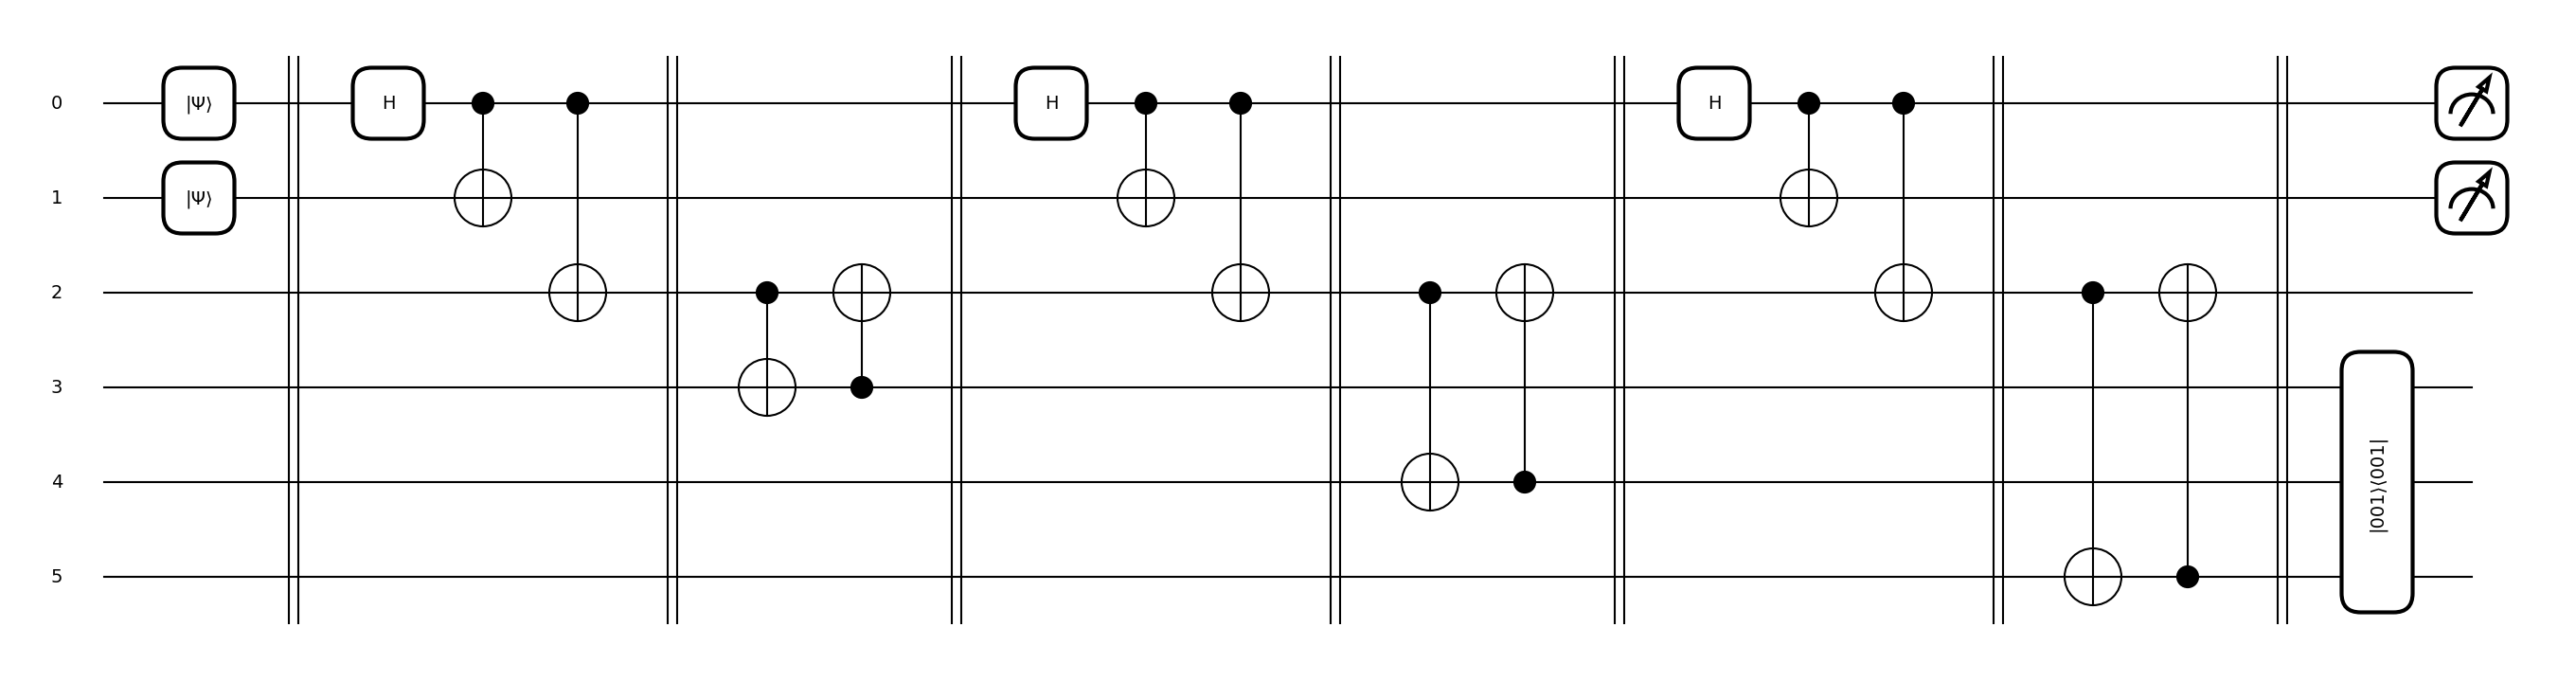

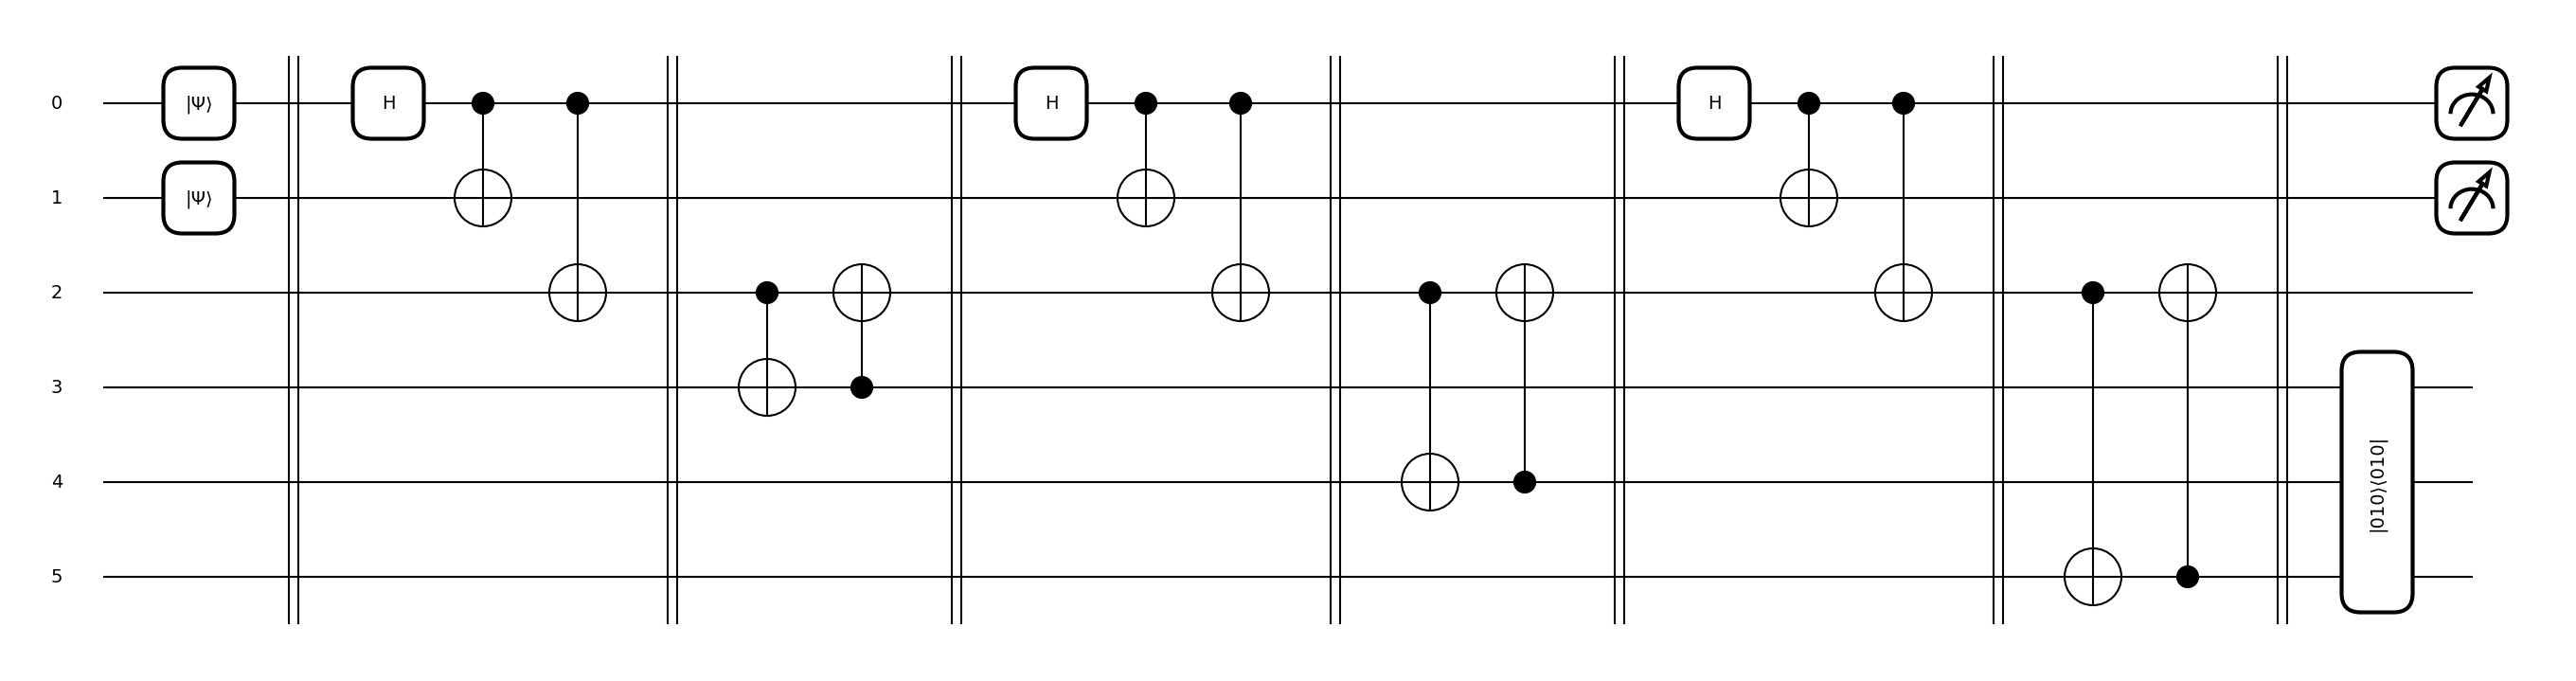

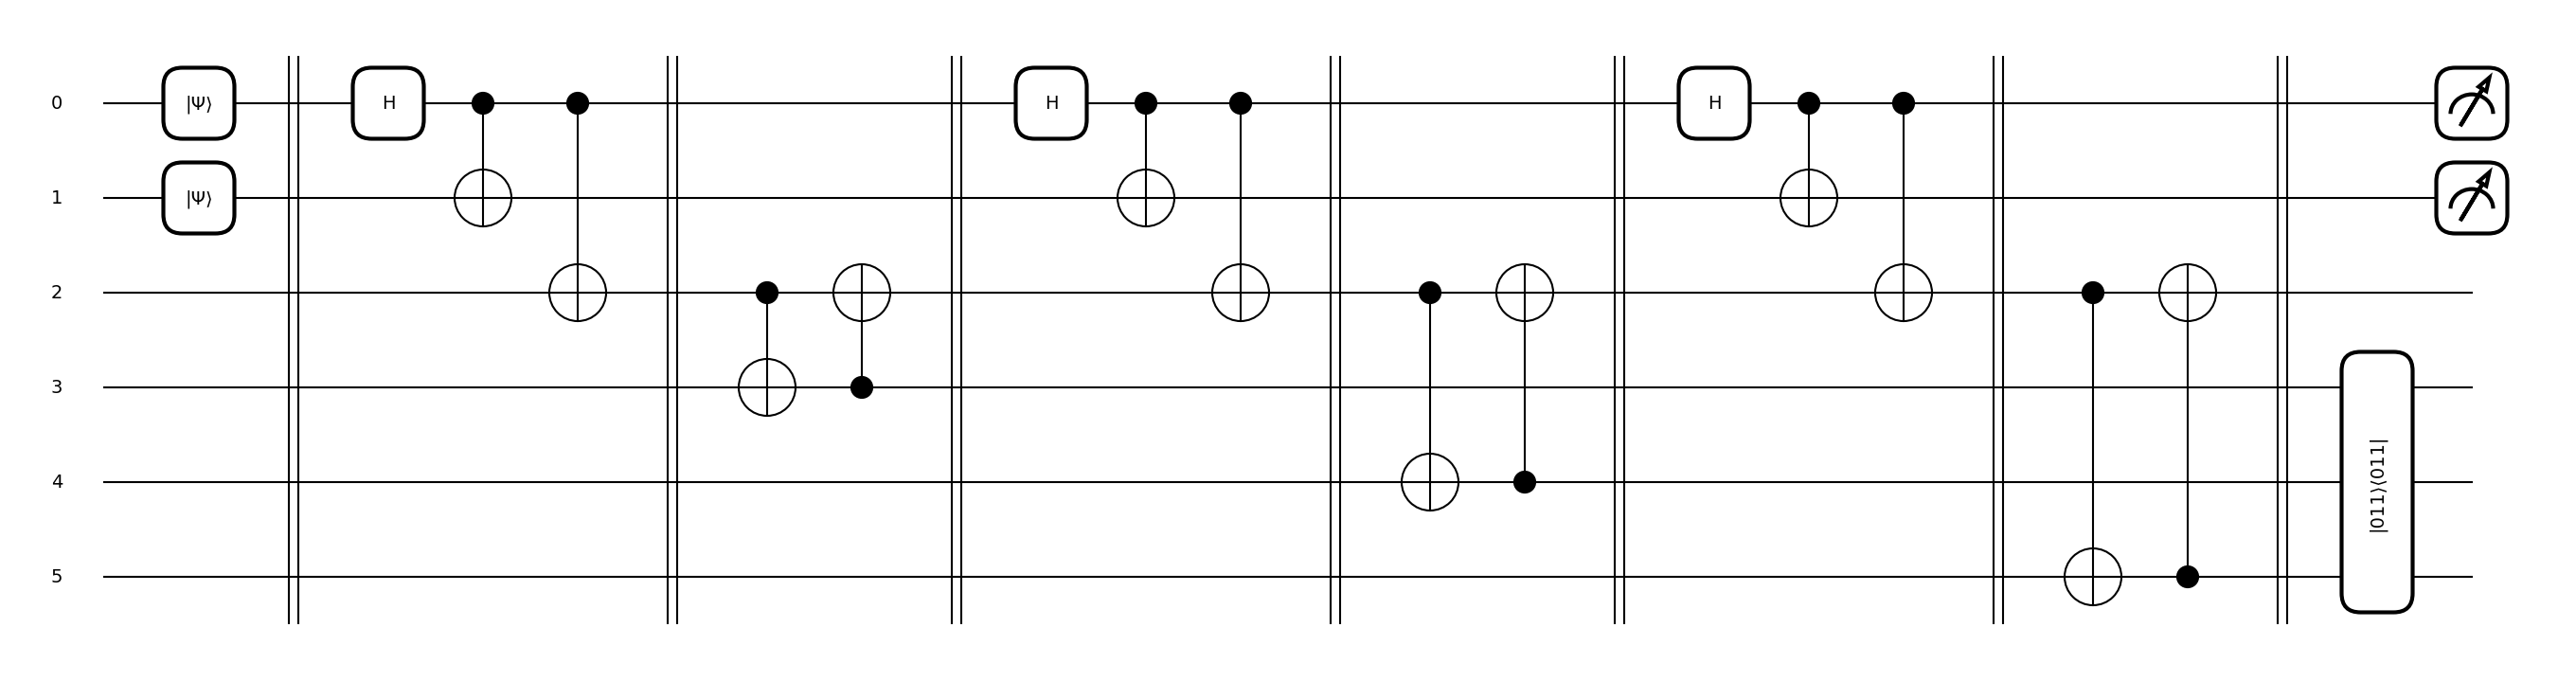

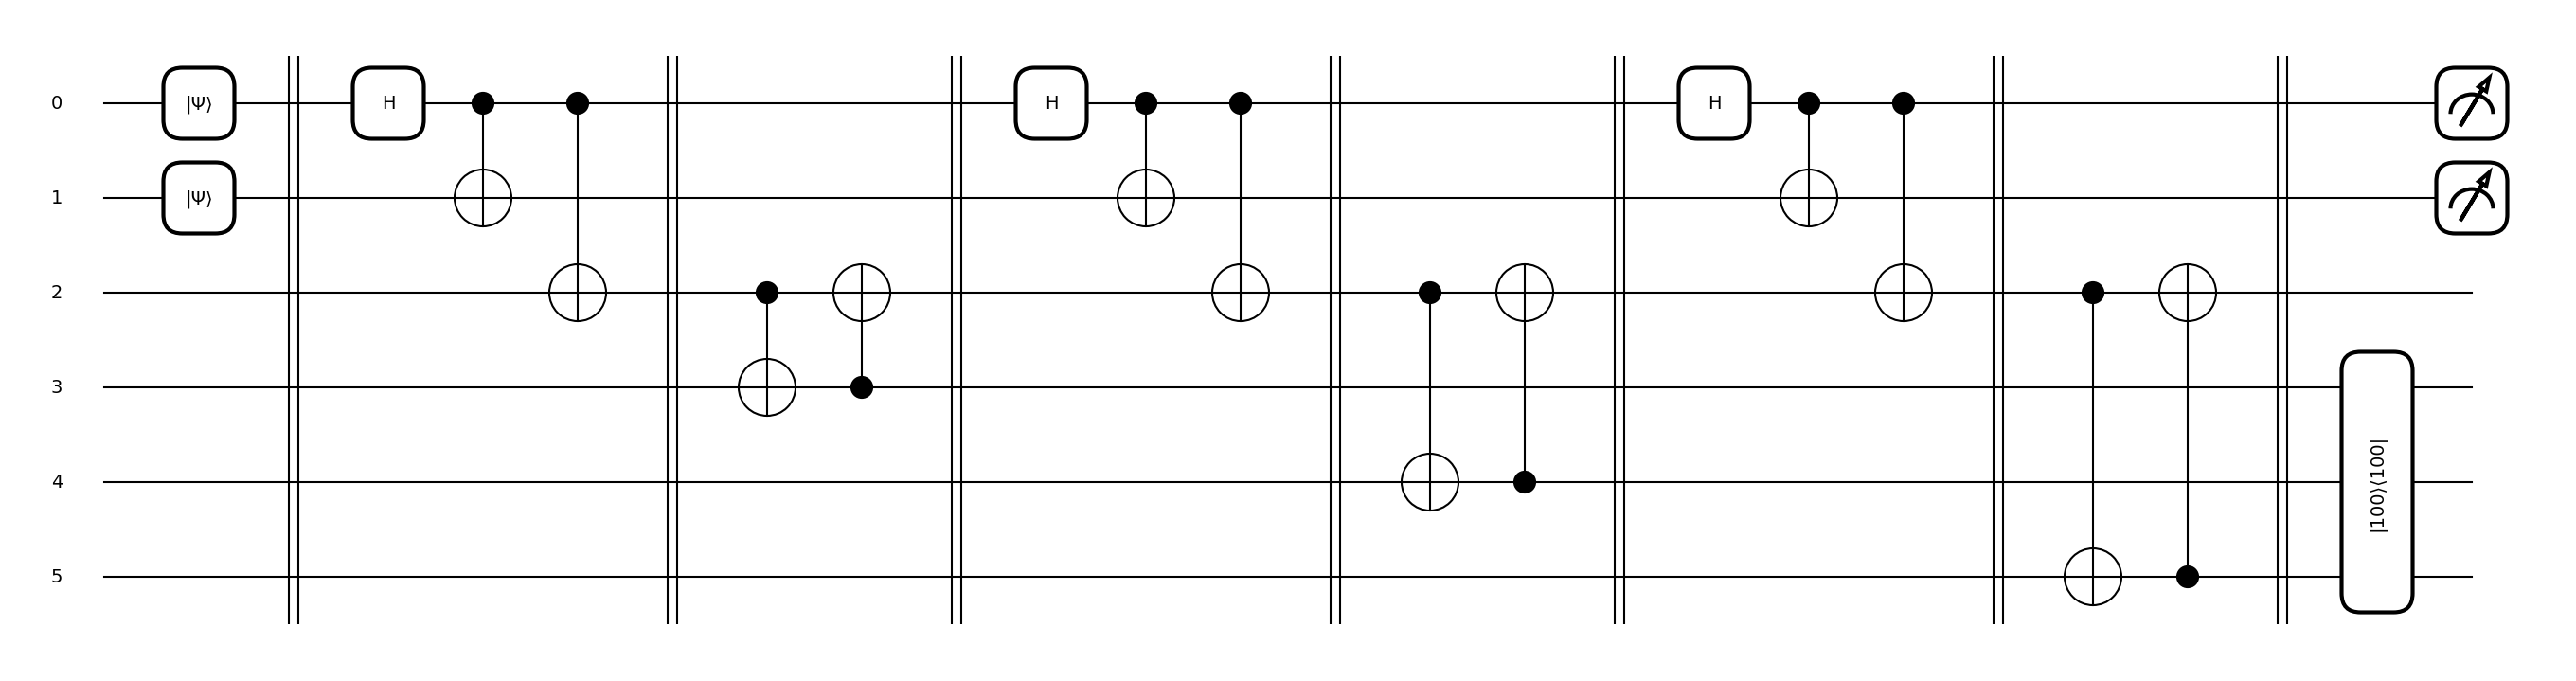

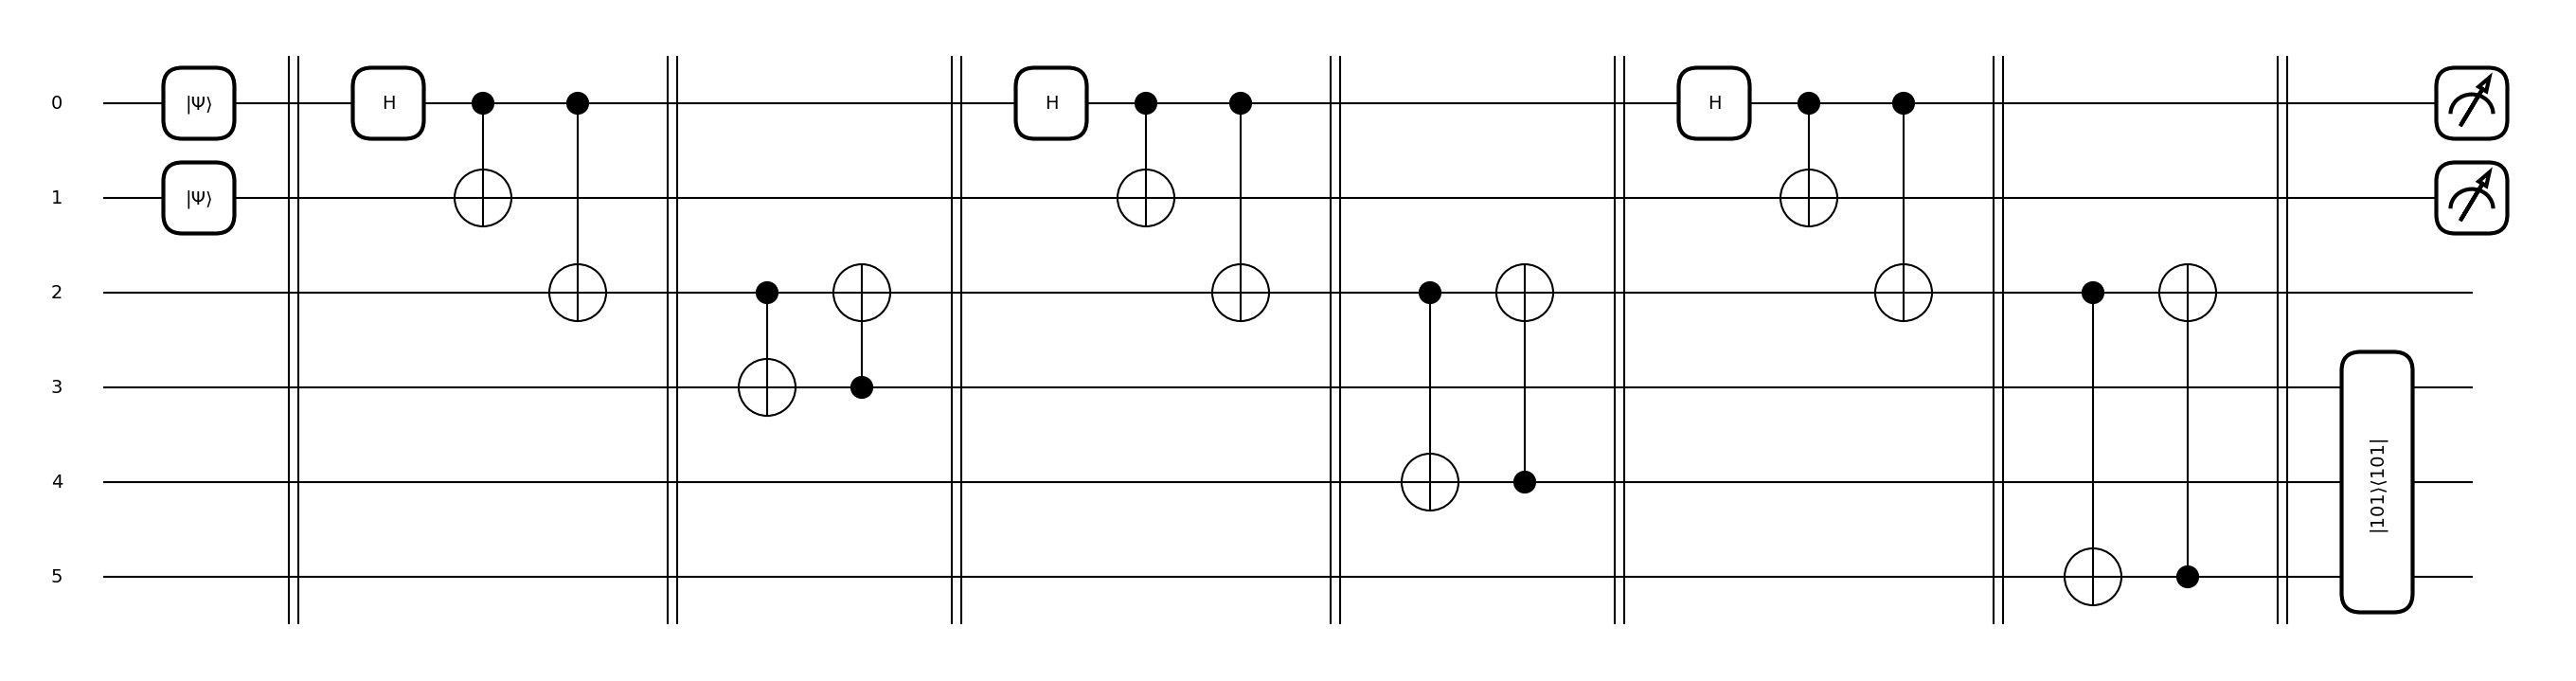

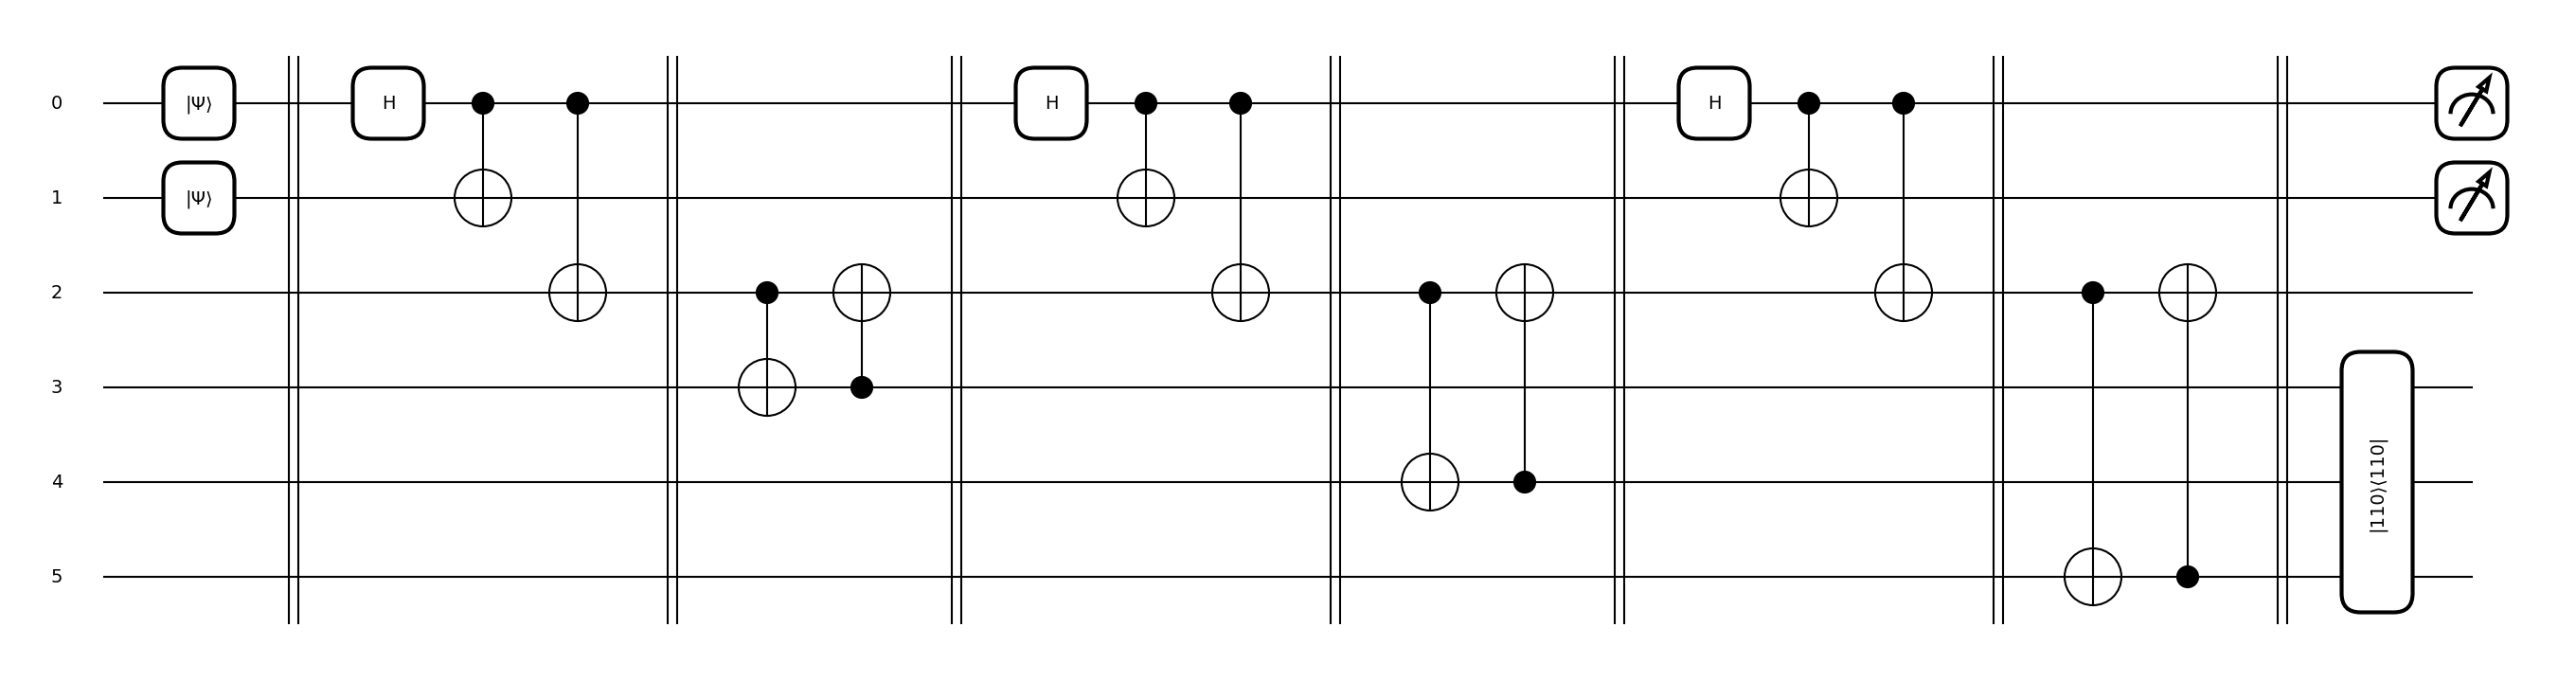

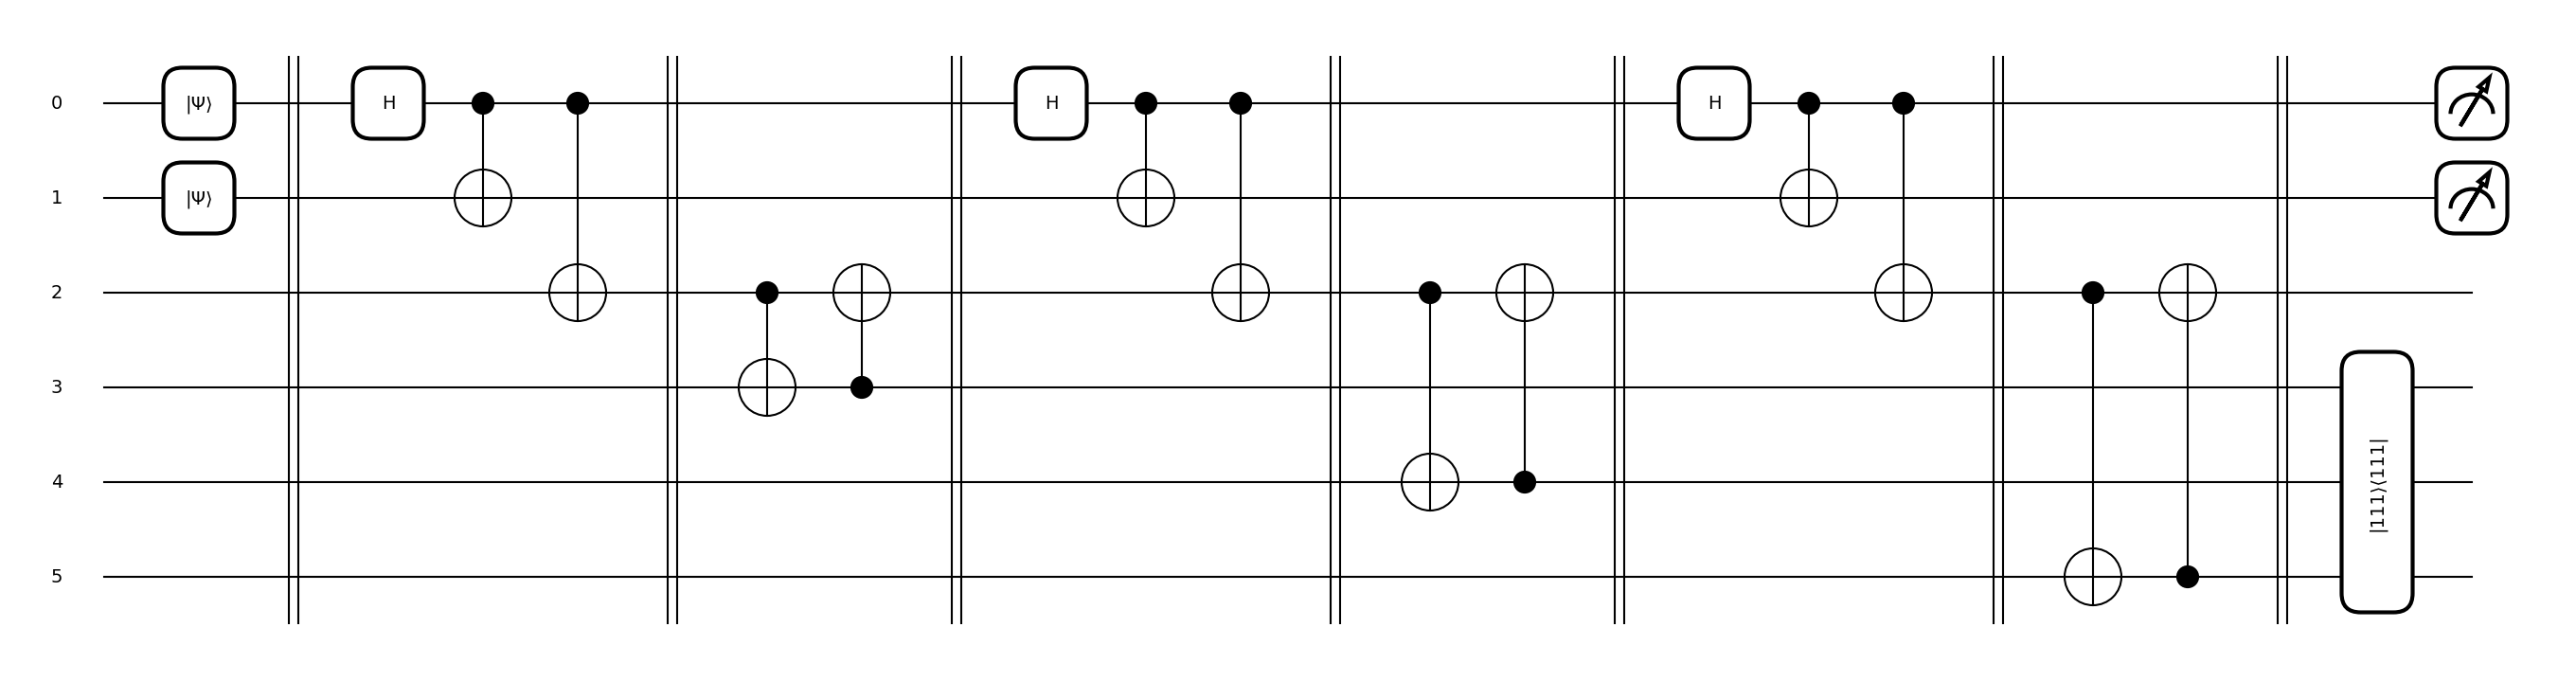

In [8]:
for i in range(2**n):
  qml.draw_mpl(node_defer)(state, select[i])

In [9]:
for i in range(2**n):
  print(node_defer(state, select[i]))
  print(qml.specs(node_defer)(state, select[i]))

[0.9 0.1 0.  0. ]
{'resources': Resources(num_wires=6, num_gates=25, gate_types=defaultdict(<class 'int'>, {'StatePrep': 2, 'Barrier': 7, 'Hadamard': 3, 'CNOT': 12, 'Projector': 1}), gate_sizes=defaultdict(<class 'int'>, {1: 5, 0: 7, 2: 12, 3: 1}), depth=24, shots=Shots(total_shots=None, shot_vector=())), 'errors': {}, 'num_observables': 1, 'num_trainable_params': 0, 'num_device_wires': 6, 'num_tape_wires': 6, 'device_name': 'default.qubit', 'level': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}
[0.  0.  0.1 0.9]
{'resources': Resources(num_wires=6, num_gates=25, gate_types=defaultdict(<class 'int'>, {'StatePrep': 2, 'Barrier': 7, 'Hadamard': 3, 'CNOT': 12, 'Projector': 1}), gate_sizes=defaultdict(<class 'int'>, {1: 5, 0: 7, 2: 12, 3: 1}), depth=24, shots=Shots(total_shots=None, shot_vector=())), 'errors': {}, 'num_observables': 1, 'num_trainable_params': 0, 'num_device_wires': 6, 'num_tape_wires': 6, 'device_name': 'default.

In [10]:
"All Matching" if np.all([np.round(node_defer(state, select[i]),10) ==
                          np.round(node(state, select[i]),10) for i in range(2**n)]) else "Mismatch"

'All Matching'

Text(0, 0.5, 'Fidelity')

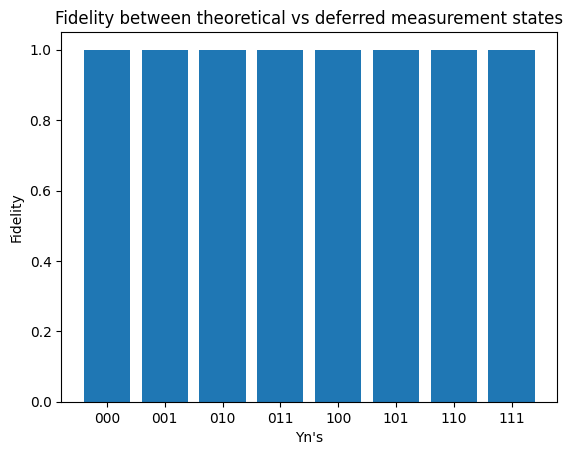

In [11]:
fed = []
yns = []

for i in range(2**n):
  yns.append(format(i, '0' + str(n) + 'b'));
  state0 = qml.math.dm_from_state_vector(np.sqrt(node_defer(state, select[i])))
  state1 = qml.math.dm_from_state_vector(np.sqrt(node(state, select[i])))
  fed.append(qml.math.fidelity(state0, state1));

plt.bar(yns, fed);
plt.title("Fidelity between theoretical vs deferred measurement states")
plt.xlabel("Yn's")
plt.ylabel("Fidelity")